# Take-home project 1

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nekrut/bda/blob/main/Projects/Project%201.ipynb)

Write your PSU email address here: rbx5039@psu.edu

Share the notebook with aun1@psu.edu

## Load the data

In [1]:
import pandas as pd

variants = pd.read_csv(
    "https://raw.githubusercontent.com/nekrut/bda/main/data/pf_variants.tsv",
    sep="\t"
)

variants.head()

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,EFFECT,IMPACT,GENE,AA_POS,HGVS_C,HGVS_P
0,ERR042228.fq,NC_004318.2,657697,T,C,324.0,14,0.857143,0,"1,0,13,0",intergenic_region,MODIFIER,PF3D7_0414500-PF3D7_0414600,-1,n.657697T>C,NaN
1,ERR042228.fq,NC_004318.2,658447,A,G,453.0,32,0.718750,11,"5,1,10,16",intergenic_region,MODIFIER,PF3D7_0414500-PF3D7_0414600,-1,n.658447A>G,NaN
2,ERR042228.fq,NC_004318.2,659163,C,A,1928.0,56,0.982143,0,"0,0,21,35",missense_variant,MODERATE,PF3D7_0414600,55,c.165G>T,p.Glu55Asp
3,ERR042228.fq,NC_004318.2,659167,C,T,1887.0,56,0.964286,0,"0,0,21,35",missense_variant,MODERATE,PF3D7_0414600,54,c.161G>A,p.Cys54Tyr
4,ERR042228.fq,NC_004318.2,660292,T,C,104.0,34,0.176471,0,"6,8,2,4",intergenic_region,MODIFIER,PF3D7_0414600-PF3D7_0414700,-1,n.660292T>C,NaN


## Instructions

Our goal is to understand whether the malaria parasite ([*Plasmodium falciparum*](https://brc-analytics.dev.clevercanary.com/data/organisms/5833)) infecting these individuals is resistant to [Pyrimethamine](https://en.wikipedia.org/wiki/Pyrimethamine)---an antimalarial drug. Resistance to Pyrimethamine is conferred by a mutation in `PF3D7_0417200` (*dhfr*) gene [Cowman1988](https://doi.org/10.1073/pnas.85.23.9109). Given sequencing data from four individuals we will determine which one of them is infected with a *Plasmodium falciparum* carrying mutations in this gene.

Variant calls in the provided Pandas data frame represent analysis of four samples: two from Ivory Coast and two from Colombia:

| Accession | Location |
|------------|------------|
| [ERR636434](https://www.ncbi.nlm.nih.gov/sra/?term=ERR636434) | Ivory coast |
| [ERR636028](https://www.ncbi.nlm.nih.gov/sra/?term=ERR636028) | Ivory coast |
| [ERR042232](https://www.ncbi.nlm.nih.gov/sra/?term=ERR042232) | Colombia |
| [ERR042228](https://www.ncbi.nlm.nih.gov/sra/?term=ERR042228) | Colombia |

These accessions correspond to datasets stored in the [Sequence Read Archive](https://www.ncbi.nlm.nih.gov/sra) at NCBI.

(data from [MalariaGen](https://www.malariagen.net/data_package/open-dataset-plasmodium-falciparum-v70/) )

## Specifics

- Filter variants falling within the *dhfr* gene
- Restrict variants to missense variants only using the effect column.
- You are specifically interested in variant at amino acid position 108
- Create a graph that shows samples vs variant coordinates, in which graph marks are proportional to alternative allele frequencies (**AF** column)
- Create a graph showing a world map in which allele frequencies of these two samples are represented as pie charts within the map of Colombia and within the map of Ivory Coast.  to be more specific, for each location you have two samples. Each of these samples will have an allele frequency at the resistance side. Use these allele frequencies as areas on the pie chart

> You can use any AI you want (preferably the one integrated in Colab) but you will never get exactly what you want, so you will have to adjust it. You will have to explain to me what the steps were.


In [2]:
dhfr = variants[variants["GENE"] == "PF3D7_0417200"] #Filter variants falling within the dhfr gene

dhfr_missense = dhfr[dhfr["EFFECT"] == "missense_variant"] #Restrict variants to missense variants only using the effect column.

dhfr_108 = dhfr_missense[dhfr_missense["AA_POS"] == 108] #Sspecifically focus on variant at amino acid position 108

dhfr_108


,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,EFFECT,IMPACT,GENE,AA_POS,HGVS_C,HGVS_P
147,ERR042228.fq,NC_004318.2,748410,G,A,2335.0,70,0.957143,0,"0,0,30,40",missense_variant,MODERATE,PF3D7_0417200,108,c.323G>A,p.Ser108Asn
830,ERR636028.fq,NC_004318.2,748410,G,A,8292.0,233,0.991416,0,"0,0,112,121",missense_variant,MODERATE,PF3D7_0417200,108,c.323G>A,p.Ser108Asn


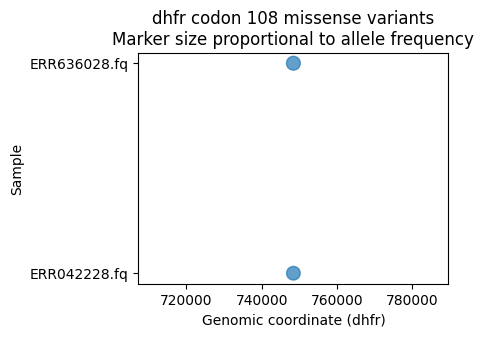

In [3]:
import matplotlib.pyplot as plt

# Create a new figure with a defined size
plt.figure(figsize=(4, 3))

# Generate a scatter plot:
# x-axis: genomic coordinates of variants within the dhfr gene
# y-axis: sample identifiers
# marker size is scaled proportionally to the alternative allele frequency (AF)
plt.scatter(
    dhfr_108["POS"],            # Genomic coordinates of the variant
    dhfr_108["Sample"],         # Sample identifiers
    s=dhfr_108["AF"] * 100,    # Marker size proportional to AF
    alpha=0.7                   # Marker transparency
)

# Label the x-axis
plt.xlabel("Genomic coordinate (dhfr)")

# Label the y-axis
plt.ylabel("Sample")

# Add a title
plt.title(
    "dhfr codon 108 missense variants\n"
    "Marker size proportional to allele frequency"
)

# Display the figure
plt.show()


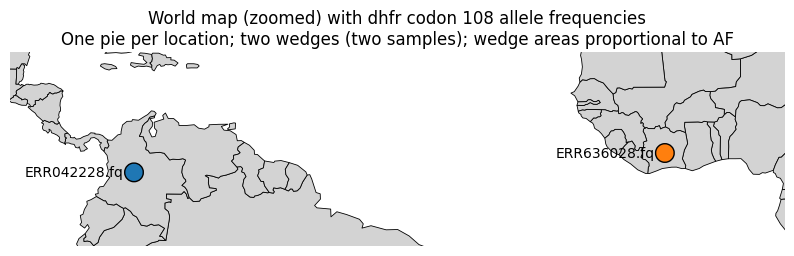

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1) Add sample to location metadata
sample_to_location = {
    "ERR636434.fq": "Ivory coast",
    "ERR636028.fq": "Ivory coast",
    "ERR042232.fq": "Colombia",
    "ERR042228.fq": "Colombia"
}

dhfr_108 = dhfr_108.copy()
dhfr_108["Location"] = dhfr_108["Sample"].map(sample_to_location)

# One AF value per sample at the resistance site (if multiple rows, take max AF)
af_per_sample = (
    dhfr_108.groupby(["Location", "Sample"], as_index=False)["AF"]
    .max()
)

# Enforce exactly two samples per location; missing AF == 0
expected_samples = pd.DataFrame({
    "Location": ["Ivory coast", "Ivory coast", "Colombia", "Colombia"],
    "Sample": ["ERR636434.fq", "ERR636028.fq", "ERR042232.fq", "ERR042228.fq"]
})

plot_df = expected_samples.merge(af_per_sample, on=["Location", "Sample"], how="left")
plot_df["AF"] = plot_df["AF"].fillna(0.0)
plot_df = plot_df[plot_df["AF"] > 0] # Remove the samples where AF = 0


# World basemap
world = gpd.read_file(
    "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
)

# Manual in-country anchor points for placing each location's pie chart
country_coords = {
    "Ivory coast": (-5.5, 7.0),
    "Colombia": (-74.0, 4.5)
}

fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.6)

fixed_radius = 1.2  # fixed size to avoid double-encoding AF

for location, group in plot_df.groupby("Location"):
    lon, lat = country_coords[location]

    sizes = group["AF"].to_numpy()        # two values: AF from the two samples
    labels = group["Sample"].to_numpy()     # two labels: sample IDs

    ax.pie(
        sizes,
        center=(lon, lat),
        radius=fixed_radius,
        labels=labels,
        labeldistance=1.1,
        wedgeprops=dict(edgecolor="black")
    )

# Set the zoom AFTER plotting pies
ax.set_xlim(-90, 10)
ax.set_ylim(-5, 20)
ax.set_aspect("equal", adjustable="box")

ax.set_title(
    "World map (zoomed) with dhfr codon 108 allele frequencies\n"
    "One pie per location; two wedges (two samples); wedge areas proportional to AF"
)

ax.set_axis_off()
plt.show()

# There are no missense variants at amino acid position 108 of the dhfr gene in ERR636434.fq and ERR042232.fq.

         Sample        AF
0  ERR636434.fq  0.000000
1  ERR636028.fq  0.991416
2  ERR042232.fq  0.000000
3  ERR042228.fq  0.957143
